# CNN 이진분류 (cats and dogs DATASET)

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-07-01 14:44:25 +09:00)


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
import keras
from keras import layers

SEED=42

time: 6.34 s (started: 2024-07-01 14:44:25 +09:00)


In [3]:
data_root = './cats_and_dogs'
train_dir = data_root + '/train'

print(train_dir)


./cats_and_dogs/train
time: 0 ns (started: 2024-07-01 14:44:31 +09:00)


## 데이터 로딩

In [4]:
class_name = ['cats','dogs']

time: 0 ns (started: 2024-07-01 14:44:31 +09:00)


In [5]:
train_cats_frames = os.listdir(train_dir + '/cats')
train_dogs_frames = os.listdir(train_dir + '/dogs')

print(train_cats_frames)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat

In [6]:
import PIL.Image


X_train = []
y_train = []

# for fname in train_cats_frames:
#         image = PIL.Image.open(train_dir + '/cats/' +fname)
#         print(image)
#         image = image.resize(224,224)
#         arr = np.array(image)
#         X_train.append(arr)
#         y_train.append(0)

def make_dataset(animal,y_label,dataset_path):
    for fname in dataset_path:
        image = PIL.Image.open(train_dir + animal + '/' +fname)
        print(image)
        image = image.resize((224,224))
        arr = np.array(image)
        X_train.append(arr)
        y_train.append(y_label)

make_dataset(animal='/cats',y_label=0,dataset_path=train_cats_frames)
make_dataset(animal='/dogs',y_label=1,dataset_path=train_dogs_frames)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x23D31986C90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x280 at 0x23D319E8D50>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=489x499 at 0x23D319E8E90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x499 at 0x23D319E8F50>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=296x200 at 0x23D319E8F90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=349x343 at 0x23D319E9010>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x386 at 0x23D319E9110>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=253x399 at 0x23D319E9150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=215x174 at 0x23D319E91D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x374 at 0x23D319E9290>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x350 at 0x23D319E92D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x332 at 0x23D319E9390>
<PIL.JpegImagePlugin.JpegIma

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=SEED)

time: 828 ms (started: 2024-07-01 14:44:40 +09:00)


In [8]:
X_train_n = np.array(X_train)
X_val_n = np.array(X_val)
y_train_n = np.array(y_train)
y_val_n = np.array(y_val)

time: 94 ms (started: 2024-07-01 14:44:41 +09:00)


In [9]:
X_train_n.shape,X_val_n.shape,y_train_n.shape,y_val_n.shape

((2080, 224, 224, 3), (520, 224, 224, 3), (2080,), (520,))

time: 15 ms (started: 2024-07-01 14:44:41 +09:00)


In [10]:
# min max scale

X_train_m = X_train_n/255.0
X_val_m = X_val_n/255.0

time: 844 ms (started: 2024-07-01 14:44:41 +09:00)


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_train_o = ohe.fit_transform(y_train_n.reshape(-1,1))
y_val_o = ohe.transform(y_val_n.reshape(-1,1))

y_train_o.shape,y_val_o.shape

c:\Users\hyundong\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((2080, 2), (520, 2))

time: 0 ns (started: 2024-07-01 14:44:42 +09:00)


In [12]:
model = keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=128,kernel_size=3,strides=1,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=128,kernel_size=3,strides=1,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2,activation='softmax'),
])

time: 141 ms (started: 2024-07-01 14:44:42 +09:00)


c:\Users\hyundong\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 831,250 (3.17 MB)

 Trainable params: 831,250 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

time: 31 ms (started: 2024-07-01 14:44:42 +09:00)


In [16]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cpck = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=training_1/cp.ckpt

time: 63 ms (started: 2024-07-01 14:47:38 +09:00)


In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

time: 16 ms (started: 2024-07-01 14:44:42 +09:00)


In [15]:
history = model.fit(X_train_m,
          y_train_o,
          epochs=3,
          batch_size=16,
          validation_data=(X_val_m,y_val_o),
          callbacks=[cpck])

Epoch 1/3
  7/130 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - accuracy: 0.4448 - loss: 0.7288

KeyboardInterrupt: 

time: 7.08 s (started: 2024-07-01 14:44:42 +09:00)


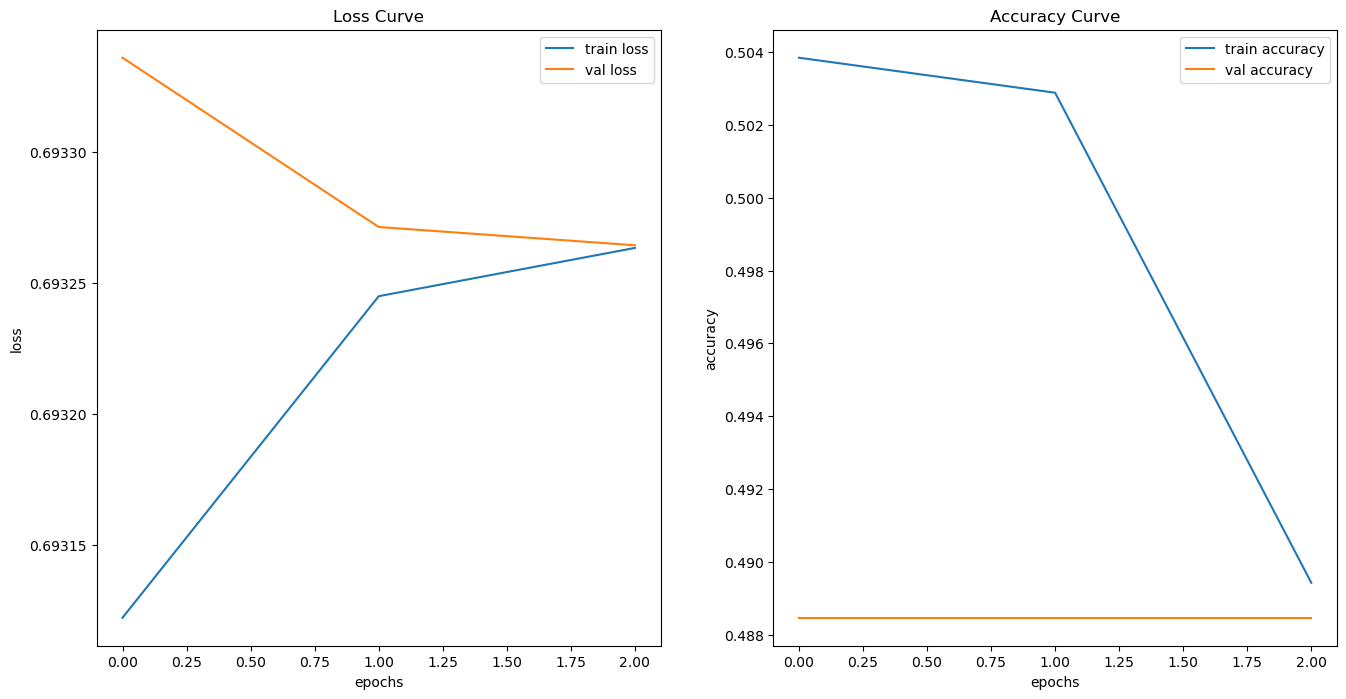

time: 547 ms (started: 2024-07-01 14:36:22 +09:00)


In [63]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()
    
plot_history(history)

## TEST DATASET 

In [72]:
test_dir = data_root + '/test'

test_cats_frames = os.listdir(test_dir + '/cats')
test_dogs_frames = os.listdir(test_dir + '/dogs')

X_test = []
y_test = []

def make_test_dataset(animal,y_label,dataset_path):
    for fname in dataset_path:
        image = PIL.Image.open(test_dir + animal + '/' + fname)
        print(image)
        image = image.resize((224,224))
        arr = np.array(image)
        X_test.append(arr)
        y_test.append(y_label)

make_dataset(animal='/cats',y_label=0,dataset_path=test_cats_frames)
make_dataset(animal='/dogs',y_label=1,dataset_path=test_dogs_frames)


FileNotFoundError: [Errno 2] No such file or directory: './cats_and_dogs/train/cats/cat.2300.jpg'

time: 47 ms (started: 2024-07-01 14:42:31 +09:00)


In [67]:
type(X_test)

list

time: 0 ns (started: 2024-07-01 14:38:28 +09:00)


In [69]:
X_test_n = np.array(X_test)
y_test_n = np.array(y_test)

X_test_n

array([], dtype=float64)

time: 16 ms (started: 2024-07-01 14:38:50 +09:00)


In [65]:
X_test_s = X_test_n/255.0
y_test_o = ohe.transform(y_test_n)

ValueError: X does not contain any features, but OneHotEncoder is expecting 1 features

time: 359 ms (started: 2024-07-01 14:36:34 +09:00)


In [ ]:
y_pred = model.predict(X_test_s)
y_pred